In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import torch
import torch
import torch.nn as nn
import torch.optim as optim

from config.default_config import DEFAULT_CONFIG
from data.dataloader import create_data_loaders
import numpy as np
from train import parse_args
from utils.helpers import set_seed, get_device


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap



In [2]:
config = DEFAULT_CONFIG

# Set random seed
set_seed(config["training"]["seed"])

# Get device
device = get_device()
print(f"Using device: {device}")

# Create data loaders
data = create_data_loaders(config)
train_loader = data["train_loader"]
val_loader = data["val_loader"]
test_loader = data["test_loader"]

Using device: cuda
 ---------------- Data Augmentation FINISHED ---------------- 
 ---------------- Dataset Concatenation FINISHED ---------------- 


Loading best trained RandomForest model...
Model loaded successfully.
Extracting features from dataloader...
Feature extraction complete.
Applying PCA...
PCA transformation complete.


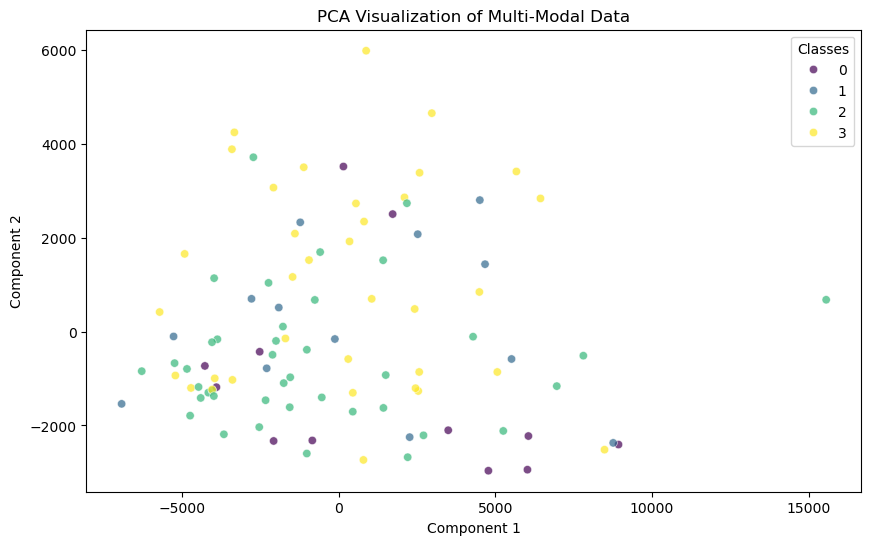

PCA plot displayed.
Applying TSNE...
TSNE transformation complete.


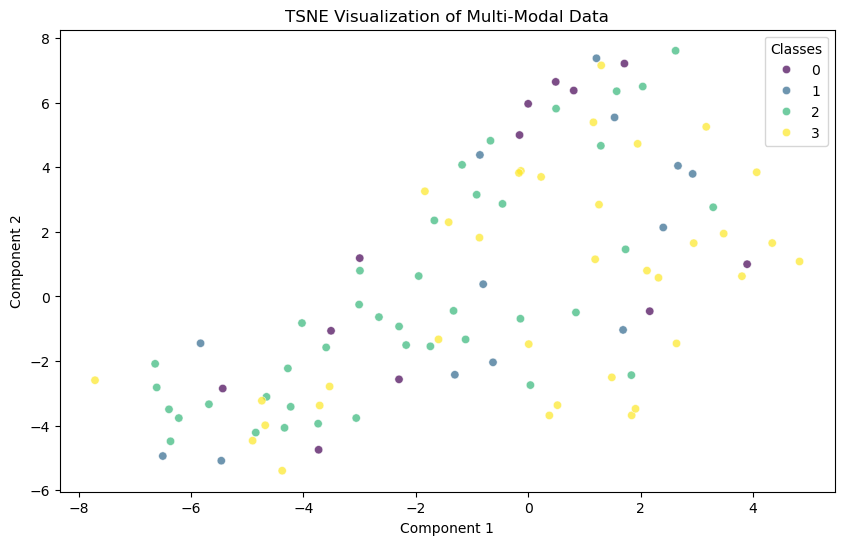

TSNE plot displayed.
Applying UMAP...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP transformation complete.


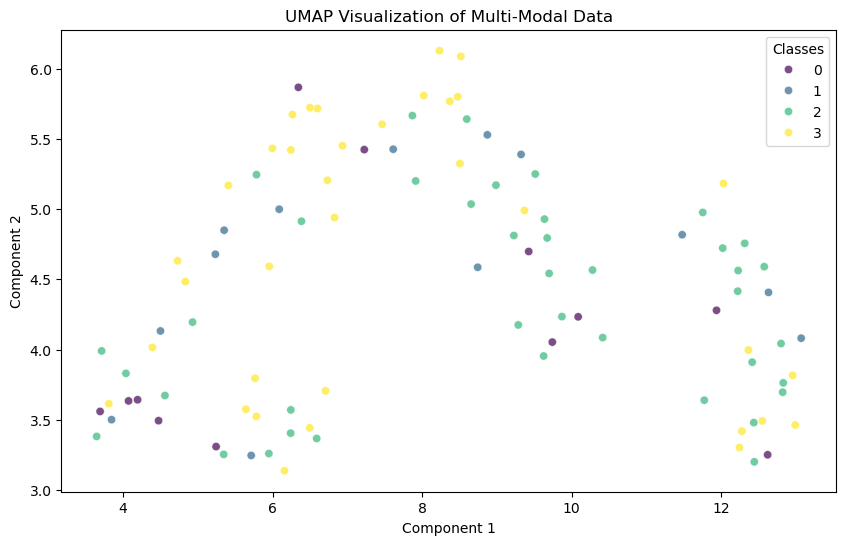

UMAP plot displayed.


In [7]:

# Function to extract features and labels
def extract_features(dataloader, device='cpu'):
    print("Extracting features from dataloader...")
    features, labels = [], []
    with torch.no_grad():
        for _, multi_modal_features, target_labels in dataloader:
            multi_modal_features = multi_modal_features.cpu().numpy()
            features.append(multi_modal_features)
            labels.append(target_labels.cpu().numpy())
    
    X = np.vstack(features)
    y = np.hstack(labels)
    print("Feature extraction complete.")
    return X, y

# Load best trained RandomForest model
print("Loading best trained RandomForest model...")
best_rf_model = joblib.load("outputs/multi_modal_best_model.pkl")
print("Model loaded successfully.")

# Extract features from test dataset (assuming you have test_loader ready)
X, y = extract_features(test_loader)

# Perform dimensionality reduction methods
methods = {
    "PCA": PCA(n_components=2),
    "TSNE": TSNE(n_components=2, perplexity=30, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42)
}

for method_name, reducer in methods.items():
    print(f"Applying {method_name}...")
    X_reduced = reducer.fit_transform(X)
    print(f"{method_name} transformation complete.")
    
    # Plot visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette="viridis", alpha=0.7)
    plt.title(f"{method_name} Visualization of Multi-Modal Data")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Classes")
    plt.show()
    print(f"{method_name} plot displayed.")
